In [1]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

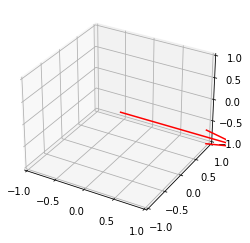

In [32]:

plt.figure()
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
origin = [0, 0, 0]
u = [2, 0, 0]
ax.quiver(*origin, *u, color="red")
plt.draw()
plt.show()

In [22]:
def rotate_matrix(r=0, p=0, y=0):
    phi = np.deg2rad(r)
    theta = np.deg2rad(p)
    psi = np.deg2rad(y)


    Rr = np.array([
        [1, 0, 0],
        [0, np.cos(phi), -np.sin(phi)],
        [0, np.sin(phi), np.cos(phi)]
        
    ])

    Rp = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
        
    ])

    Ry = np.array([
        [np.cos(psi), -np.sin(psi), 0],
        [np.sin(psi), np.cos(psi), 0],
        [0, 0, 1]
    ])



    R = Ry @ Rp @ Rr
    return R

In [38]:
def los(h, tilt_deg, x_deg, y_deg):
    x = np.deg2rad(x_deg)
    y = np.deg2rad(y_deg)
    tilt = np.deg2rad(tilt_deg)
    camp = np.sin(tilt+y)*np.cos(x)
    return h/camp

In [42]:
h_fov = 50
v_fov = 40
for point in [( h_fov/2, -v_fov/2),
              (-h_fov/2, -v_fov/2),
              (h_fov/2, v_fov/2),
              (-h_fov/2, v_fov/2)
              ]:
    calc_los = los(100, 110, *point)
    print(calc_los)

110.33779189624917
110.33779189624917
144.0357578301917
144.0357578301917


<Figure size 432x288 with 0 Axes>

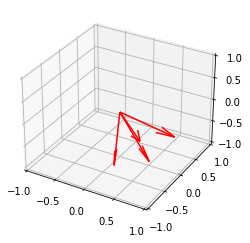

In [31]:

h_fov = 50
v_fov = 40

origin = np.array([0, 0, 0])
normal = np.array([1, 0, 0]).T

r_top = rotate_matrix(p=-v_fov/2, y=h_fov/2)
l_top = rotate_matrix(p=-v_fov/2, y=-h_fov/2)
r_down = rotate_matrix(p=v_fov/2, y=h_fov/2)
l_down = rotate_matrix(p=v_fov/2, y=-h_fov/2)

tilt = 60
pan_tag = 0
yaw = 0

gimbal_matrix = rotate_matrix(p=tilt, y=pan_tag)
yaw_matrix = rotate_matrix(y=yaw)


plt.figure()
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# ax.quiver(*origin, *u, color="green")
for camera_matrix in [r_top, l_top, r_down, l_down]:
    v = yaw_matrix @ gimbal_matrix @ camera_matrix @ normal
    ax.quiver(*origin, *v, color="red")
plt.draw()
plt.show()